In [46]:
#import library
import pandas as pd # pandas 
import numpy as np # numpy
import time
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

# Prepare and Analyze Data

1. Load Dataset
2. Analyze Dataset
3. Preprocess data (type, null, missing, ...)
4. Feature Engineering

## Load Dataset

In [115]:
# read data using Pandas DataFrame
def read_dataset(path):
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

In [116]:
path = "final_house_loan.csv" # Path to your file

df = read_dataset(path)
#ToDo: Show histogram of dataframe

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


## Data Analysis

In [117]:
df.shape

(47297, 8)

count     47297.000000
mean      46487.229765
std       32549.905634
min         254.586578
25%       21782.822159
50%       38822.132402
75%       62612.236905
max      366131.165218
Name: Loan Sanction Amount (USD), dtype: float64


C:\Users\mikej\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


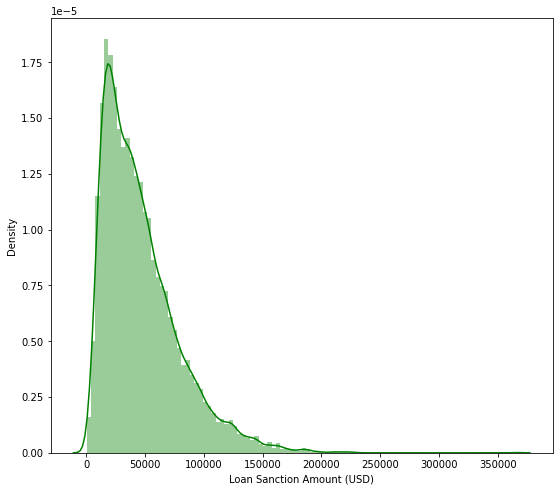

In [118]:
print(df['Loan Sanction Amount (USD)'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Loan Sanction Amount (USD)'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47297 entries, 0 to 47296
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      47297 non-null  object 
 1   Age                         47297 non-null  int64  
 2   Income (USD)                47265 non-null  float64
 3   Income Stability            47285 non-null  object 
 4   Property Age                47263 non-null  float64
 5   Property Location           47294 non-null  object 
 6   Property Price              47297 non-null  float64
 7   Loan Sanction Amount (USD)  47297 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.9+ MB


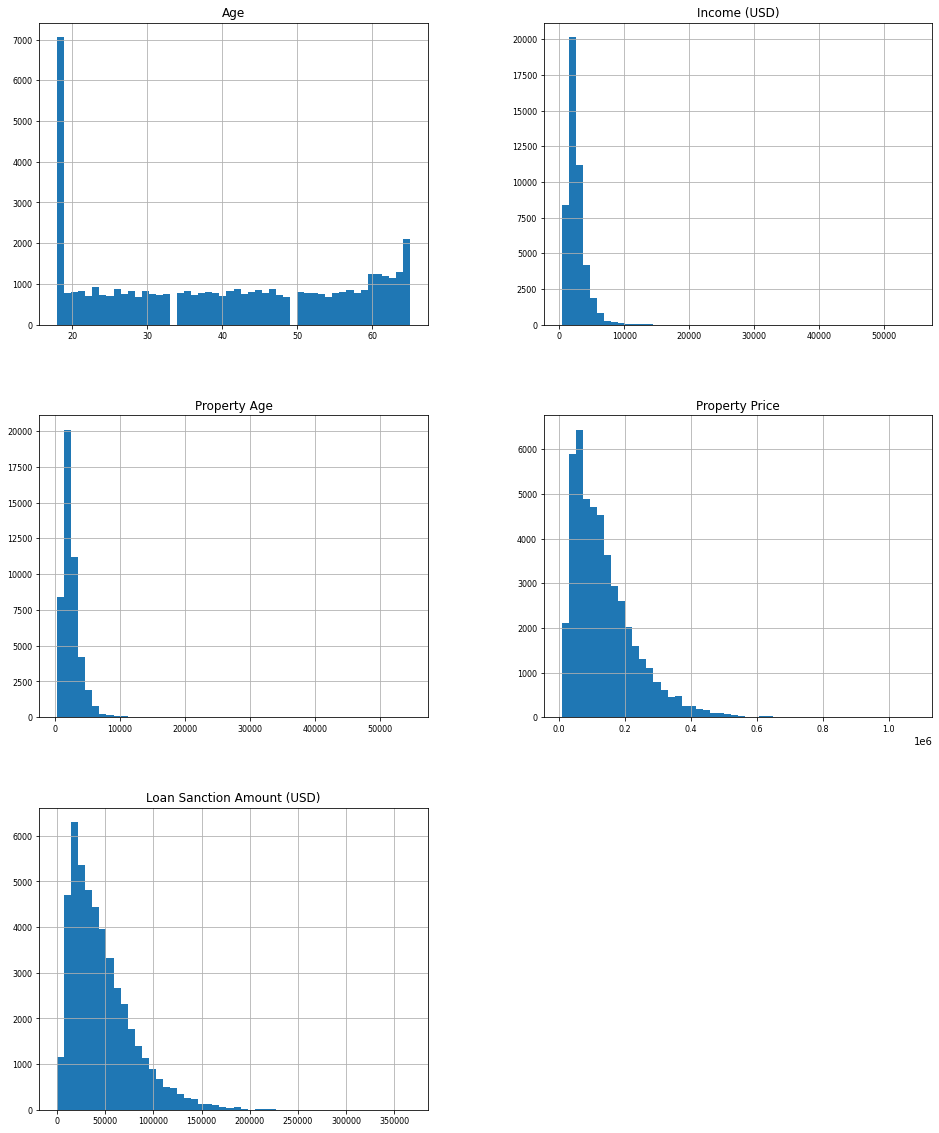

In [120]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

## Preprocessing

In [121]:
print("Missing Values by Column")
print("-"*30)
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
------------------------------
Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 81


In [122]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [123]:
print(missing_value_df)

                                           column_name  percent_missing
Gender                                          Gender         0.000000
Age                                                Age         0.000000
Income (USD)                              Income (USD)         0.067658
Income Stability                      Income Stability         0.025372
Property Age                              Property Age         0.071886
Property Location                    Property Location         0.006343
Property Price                          Property Price         0.000000
Loan Sanction Amount (USD)  Loan Sanction Amount (USD)         0.000000


Phần trăm các **(missing value/tổng value)** là rất nhỏ nên em sẽ drop các tất cả các giá trị missing này (các value hầu như không ảnh hưởng đến bài toán và model)

In [126]:
def preprocessing_data(df):
    df = df.dropna()
    return df

In [127]:
df = preprocessing_data(df.copy())
print(df.isna().sum())

Gender                        0
Age                           0
Income (USD)                  0
Income Stability              0
Property Age                  0
Property Location             0
Property Price                0
Loan Sanction Amount (USD)    0
dtype: int64


## Feature Engineering

In [128]:
def normalize_data(df):
    objecCol  =df.select_dtypes(include = ['O']).columns
    for i, x in enumerate(objecCol):  
        print(x, df[x].unique())
    df = pd.get_dummies(data = df) 
    return df

Gender ['F' 'M']
Income Stability ['Low' 'High']
Property Location ['Rural' 'Urban' 'Semi-Urban']


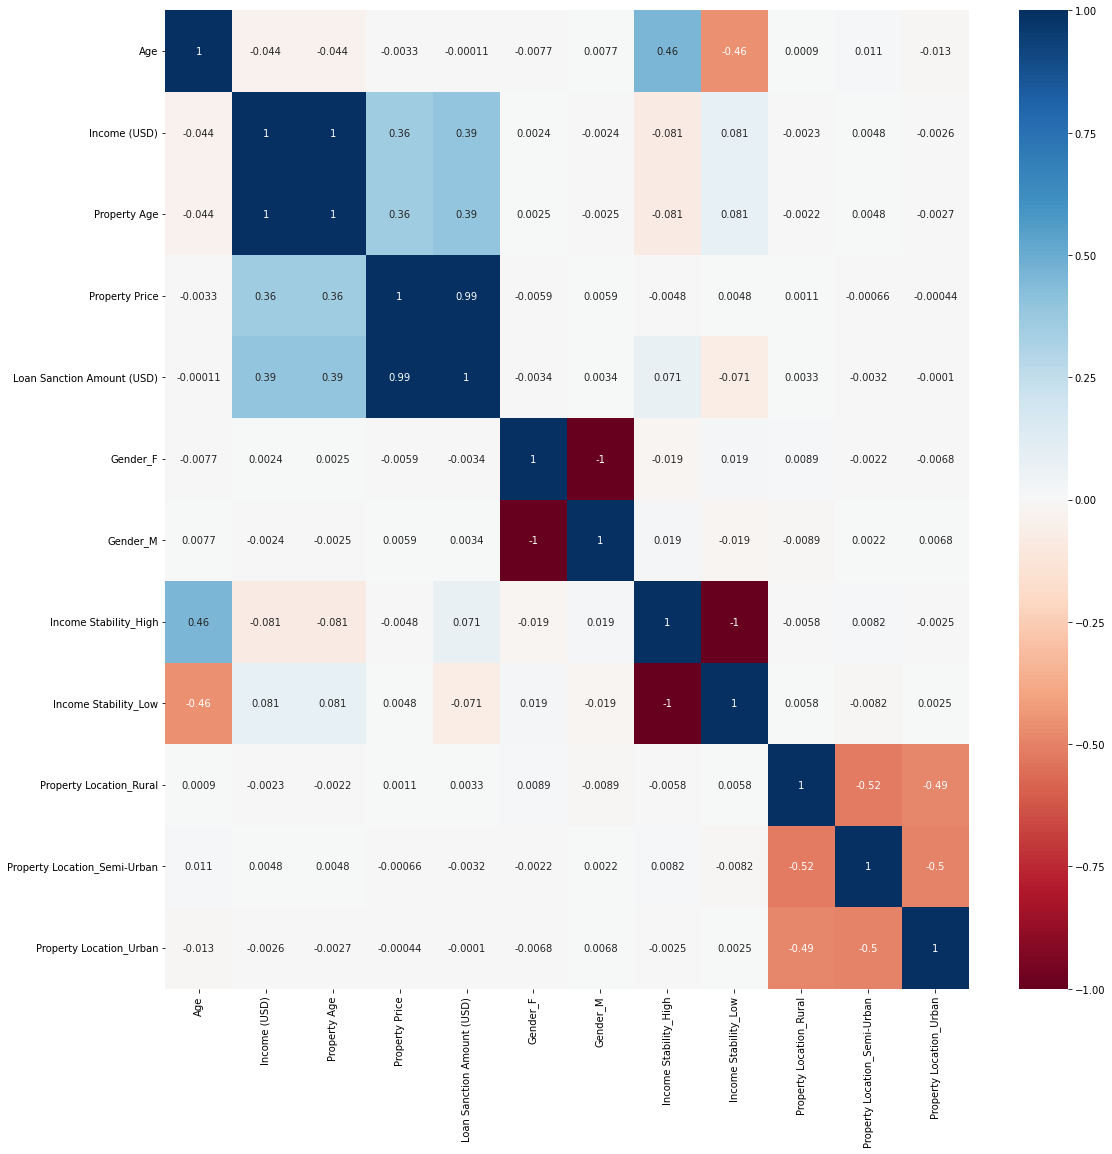

In [129]:
# Heatmap
import seaborn as sns

df = normalize_data(df.copy())
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot = True, cmap="RdBu")
plt.show()

In [130]:
df.corr()['Loan Sanction Amount (USD)']

Age                            -0.000115
Income (USD)                    0.392897
Property Age                    0.392892
Property Price                  0.994429
Loan Sanction Amount (USD)      1.000000
Gender_F                       -0.003396
Gender_M                        0.003396
Income Stability_High           0.070969
Income Stability_Low           -0.070969
Property Location_Rural         0.003297
Property Location_Semi-Urban   -0.003177
Property Location_Urban        -0.000103
Name: Loan Sanction Amount (USD), dtype: float64

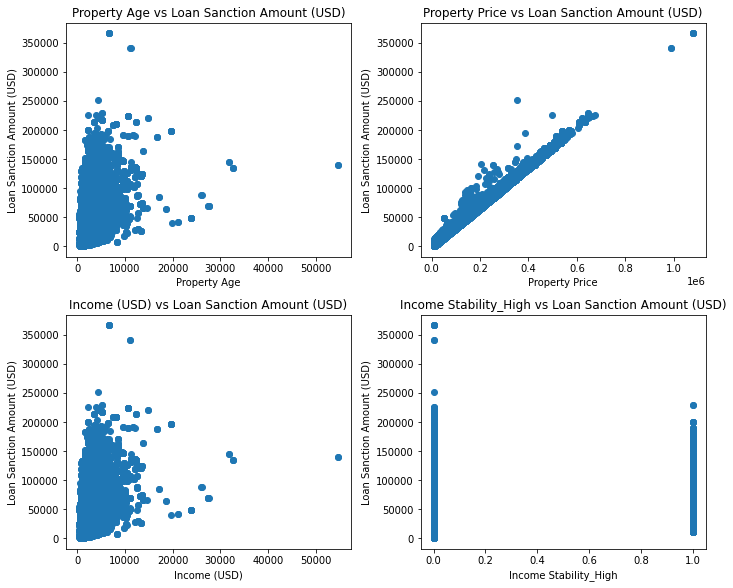

In [131]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['Loan Sanction Amount (USD)'])
    plt.title(x+' vs Loan Sanction Amount (USD)')
    plt.ylabel('Loan Sanction Amount (USD)')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('Property Age', 1)
scatter('Property Price', 2)
scatter('Income (USD)', 3)
scatter('Income Stability_High', 4)

plt.tight_layout()

# Apply machine learning model

## Train-test split

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [133]:
def prepare_X_y(df):
    
    y = df.pop('Loan Sanction Amount (USD)')
    X = df
    return X, y

X, y = prepare_X_y(df)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (37800, 11)
x test:  (9451, 11)
y train:  (37800,)
y test:  (9451,)


In [143]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Basic Linear Regression

In [144]:
>>> from sklearn.metrics import r2_score

In [145]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train,y_train)
pred = linear_model.predict(X_train)   
print("mean absolute error of linear model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
pred = linear_model.predict(X_test)   
print("mean absolute error of linear model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test) )
r2 = r2_score(y_test, linear_model.predict(X_test))
print("R2 Score: ", r2)
print(linear_model.coef_) # print coefficient
print()
print(linear_model.intercept_) # print intercept_


mean absolute error of linear model on train set  122.55512072878636
mean absolute error of linear model on test set  124.8120489289727
R2 Score:  0.9979298306889142
[-1.27122170e+03  7.79039562e+02  8.18676994e+02  3.18084975e+04
  1.26635774e+13  1.26635774e+13 -6.07602045e+13 -6.07602045e+13
 -8.76979358e+14 -8.81536283e+14 -8.61745840e+14]

46533.04011679836


## Ridge Regression

In [146]:
from sklearn.linear_model import Ridge


ridge_model = Ridge(alpha = 1e-5, fit_intercept=True)
ridge_model.fit(X_train, y_train)
# Compare on training dataset
pred = ridge_model.predict(X_train)   
print("mean absolute error of Ridge model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
pred = ridge_model.predict(X_test)   
print("mean absolute error of Ridge model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test))
r2 = r2_score(y_test, pred)
print("R2 Score: ", r2)
print(ridge_model.coef_) # print coefficient
print()
print(ridge_model.intercept_) # print intercept_


mean absolute error of Ridge model on train set  122.6911886175802
mean absolute error of Ridge model on test set  124.96609940667045
R2 Score:  0.997929862197301
[-1.27114192e+03  8.17895345e+02  7.79885647e+02  3.18084090e+04
  6.23418719e+01 -6.23419865e+01  1.58663907e+03 -1.58663456e+03
  6.16090022e+01 -6.81365465e+01  7.00507690e+00]

46533.089662992395


## Lasso

In [147]:
from sklearn.linear_model import Lasso


las_model = Lasso(alpha = 1e-5,fit_intercept=True)
las_model.fit(X_train, y_train)
# Compare on training dataset
pred = las_model.predict(X_train)   
print("mean absolute error of lasso model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
pred = las_model.predict(X_test)   
print("mean absolute error of lasso model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test))
r2 = r2_score(y_test, pred)
print("R2 Score: ", r2)
print(las_model.coef_) # print coefficient
print()
print(las_model.intercept_) # print intercept_


mean absolute error of lasso model on train set  122.71042409587506
mean absolute error of lasso model on test set  125.0372151544399
R2 Score:  0.9979298458250426
[-1.27111835e+03  1.57759780e+03  2.01988186e+01  3.18083847e+04
  1.24721285e+02 -8.80783527e-14  3.17322140e+03 -0.00000000e+00
  8.07942754e+01 -4.88635571e+01  2.58347773e+01]

46533.089662992395


C:\Users\mikej\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39992910368.26263, tolerance: 4005988824.045079
  model = cd_fast.enet_coordinate_descent(


## ElasticNet

In [151]:
from sklearn.linear_model import ElasticNet


e_model = ElasticNet(alpha = 1e-5,fit_intercept=True)
e_model.fit(X_train, y_train)
# Compare on training dataset
pred = e_model.predict(X_train)   
print("mean absolute error of elastics net model on train set ", mean_absolute_error(y_pred=pred, y_true=y_train) )
pred = e_model.predict(X_test)   
print("mean absolute error of elastic net model on test set ", mean_absolute_error(y_pred=pred, y_true=y_test))
r2 = r2_score(y_test, pred)
print("R2 Score: ", r2)
print(e_model.coef_) # print coefficient
print()
print(e_model.intercept_) # print intercept_


mean absolute error of elastics net model on train set  122.70094686928906
mean absolute error of elastic net model on test set  125.02794316760787
R2 Score:  0.997929848897947
[-1.27111085e+03  1.56985934e+03  2.80023819e+01  3.18082027e+04
  1.24099386e+02 -6.19793937e-01  3.15743456e+03 -1.57883063e+01
  8.06063930e+01 -4.90520979e+01  2.56508089e+01]

46533.089662992395


C:\Users\mikej\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40114172367.03556, tolerance: 4005988824.045079
  model = cd_fast.enet_coordinate_descent(


In [152]:
print("So sánh MAE của từng thuật toán")
print("--"*30)
print("MAE of linear model on test set: ",mean_absolute_error(y_pred=linear_model.predict(X_test), y_true=y_test))
print("MAE of ridge model on test set: ",mean_absolute_error(y_pred=ridge_model.predict(X_test), y_true=y_test))
print("--"*30)
print("MAE of linear model on test set: ",mean_absolute_error(y_pred=linear_model.predict(X_test), y_true=y_test))
print("MAE of lasso model on test set: ",mean_absolute_error(y_pred=las_model.predict(X_test), y_true=y_test))
print("--"*30)
print("MAE of linear model on test set: ",mean_absolute_error(y_pred=linear_model.predict(X_test), y_true=y_test))
print("MAE of elastic net model on test set: ",mean_absolute_error(y_pred=e_model.predict(X_test), y_true=y_test))

So sánh MAE của từng thuật toán
------------------------------------------------------------
MAE of linear model on test set:  124.8120489289727
MAE of ridge model on test set:  124.96609940667045
------------------------------------------------------------
MAE of linear model on test set:  124.8120489289727
MAE of lasso model on test set:  125.0372151544399
------------------------------------------------------------
MAE of linear model on test set:  124.8120489289727
MAE of elastic net model on test set:  125.02794316760787


- **MAE của Linear so với 3 thuật toán còn lại trên tập test là gần tương tự nhau**

## Polynomial Transform 

In [156]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def build_pipeline(X, y, degree = 2):
    poly_model = make_pipeline(PolynomialFeatures(degree = degree, include_bias=False), LinearRegression())
    poly_model.fit(X, y)  

    return poly_model
degree = [2, 3, 4]
for i in range(len(degree)):
    poly_model = build_pipeline(X_train, y_train, degree[i])
    # Compare on training dataset
    poly_pred = poly_model.predict(X_train)
    print("Degree: ", degree[i])
    print("MAE of linear model (poly transform) on train set: ", mean_absolute_error(y_pred=poly_pred, y_true=y_train) )

    poly_pred = poly_model.predict(X_test)
    print("MAE of linear model (poly transform) on test set: ", mean_absolute_error(y_pred=poly_pred, y_true=y_test))
    print("--"*30)

Degree:  2
MAE of linear model (poly transform) on train set:  140.03560064660033
MAE of linear model (poly transform) on test set:  141.91499910170424
------------------------------------------------------------
Degree:  3
MAE of linear model (poly transform) on train set:  142.58377343264598
MAE of linear model (poly transform) on test set:  144.0931025076501
------------------------------------------------------------
Degree:  4
MAE of linear model (poly transform) on train set:  157.7788880099838
MAE of linear model (poly transform) on test set:  163.09270729099475
------------------------------------------------------------


Vì ram lap của em không cho phép nên chỉ có thể chạy đến khoảng order = 4. Tuy nhiên em nhận thấy rằng khi tăng bậc của Polyminals thì MAE của tập train và tập test càng sai khác. Và khả năng tăng sự phức tạp của hàm sẽ làm cho hàm sẽ không còn là bậc 0 hoặc bậc 1 nữa mà trở thành một đường cong và tăng khả năng bị overfitting hơn.